In [8]:
import fastf1 as ff1
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [9]:
# Configurazione
ff1.Cache.enable_cache(r"C:\Users\domen\OneDrive\Desktop\Fast F1")  # Abilita la cache per salvare i dati

core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '4', '55', '44', '1', '63', '11', '23', '20', '14', '43', '3', '31', '10', '77', '27', '24', '18', '22']
c:\Users\domen\OneDrive\Desktop\Develhope\Projects\Github\F1 

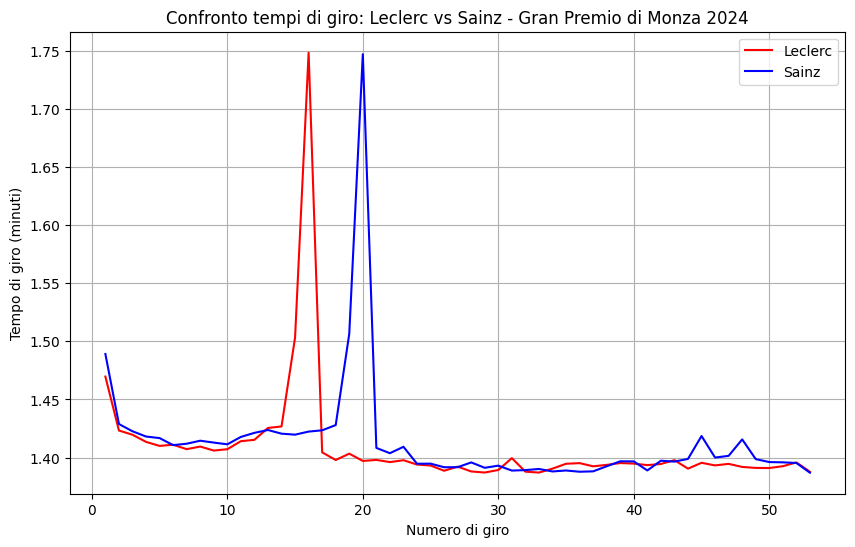

In [10]:
# Carica i dati del Gran Premio di Monza 2024
session = ff1.get_session(2024, 'Monza', 'R')
session.load()

# Ottieni i tempi di giro di Leclerc e Sainz
leclerc_laps = session.laps.pick_driver('LEC')
sainz_laps = session.laps.pick_driver('SAI')

# Crea un DataFrame con i tempi di giro
leclerc_times = leclerc_laps[['LapNumber', 'LapTime']].dropna()
sainz_times = sainz_laps[['LapNumber', 'LapTime']].dropna()

# Converti i tempi di giro in minuti
leclerc_times['LapTime_minutes'] = leclerc_times['LapTime'].dt.total_seconds() / 60
sainz_times['LapTime_minutes'] = sainz_times['LapTime'].dt.total_seconds() / 60

# Crea il grafico
plt.figure(figsize=(10, 6))
plt.plot(leclerc_times['LapNumber'], leclerc_times['LapTime_minutes'], label='Leclerc', color='red')
plt.plot(sainz_times['LapNumber'], sainz_times['LapTime_minutes'], label='Sainz', color='blue')

# Aggiungi titolo e etichette
plt.title('Confronto tempi di giro: Leclerc vs Sainz - Gran Premio di Monza 2024')
plt.xlabel('Numero di giro')
plt.ylabel('Tempo di giro (minuti)')
plt.legend()

# Mostra il grafico
plt.grid(True)
plt.show()